In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import time

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

Using TensorFlow backend.


In [3]:
def scale_training_data(X_train, Y_train):
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    
    X_train_s = x_scaler.fit_transform(X_train)
    Y_train_s = y_scaler.fit_transform(Y_train)
    
    return X_train_s, Y_train_s, x_scaler, y_scaler

In [4]:
def train_test_split(X_train, Y_train, train_portion):

    x_train = X_train[0:int(n_timesteps*train_portion),:]
    x_test = X_train[int(n_timesteps*(train_portion)):,:]
    y_train = Y_train[0:int(n_timesteps*train_portion),:]
    y_test = Y_train[int(n_timesteps*(train_portion)):,:]
    
    return x_train, y_train, x_test, y_test

In [5]:
def baseline_model(input_dim, output_dim, height):
    model = Sequential()
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    #model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model

In [6]:
def prepare_training_data(df_F, df_D, d, t):

    D = df_D.values
    F = df_F.values
    dim = np.shape(D)

    n_timesteps, n_nodes = dim
    x = np.linspace(0,1, n_nodes)

    X_train = np.zeros([n_timesteps-d, d*n_nodes])
    Y_train = np.zeros([n_timesteps-d, n_nodes])


    for k in range(n_timesteps-d):

        bulk = 0
        for j in range(n_nodes):
            X_train[k, bulk:bulk + d] = F[t-d:t,j]    
            bulk += d

        #for j in range(n_nodes):
        #    X_train[k, bulk:bulk + d] = D[t-d:t,j]
        #    bulk += d

        #for j in range(n_nodes):
         #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
          #  bulk += d

        Y_train[k, 0:n_nodes] = D[t, :]
        #Y_train[i, n_nodes:] = Dt[i, :]/rt_max
        t += 1
        
    return X_train, Y_train, n_timesteps, n_nodes, x

In [7]:
def get_error(predictions, y_test):
    error = 0
    for i in range(len(predictions[:,0])):
        error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
    return error

In [8]:
########################### TRAIN FEED-FORWARD MODEL #################################

d = 10 #number of steps in "model memory"
t = d
n_batches = 1

t0 = time.time()
for i in range(n_batches):

    df_D = pd.read_csv('C:/Users/endrep/Documents/training_batches/D' + str(i+1) + '.csv')
    df_F = pd.read_csv('C:/Users/endrep/Documents/training_batches/F' + str(i+1) + '.csv')
    
    X_train, Y_train, n_timesteps, n_nodes, x = prepare_training_data(df_F, df_D, d, t)
    
    X_train_s, Y_train_s, x_scaler, y_scaler = scale_training_data(X_train, Y_train)
    
    x_train, y_train, x_test, y_test = train_test_split(X_train_s, Y_train_s, 0.8)
    
    input_dim = len(X_train[0,:])
    output_dim = len(Y_train[0,:])

    if i == 0:
        model = baseline_model(input_dim, output_dim, 100)
    
    ts = time.time()
    model.fit(x_train, y_train, epochs=100, verbose = 1)
    training_time = time.time() - ts
    
    pred_train = model.predict(x_train)
    pred_train_u = y_scaler.inverse_transform(pred_train)
    
    pred_test = model.predict(x_test)
    pred_test_u = y_scaler.inverse_transform(pred_test)
    
    pred_ind = independet_predictions(x_test)
    pred_ind_u = y_scaler.inverse_transform(pred_ind)
    
    
    training_error = get_error(pred_train, y_train)
    test_error = get_error(pred_test, y_test)
    ind_error = get_error(pred_ind, y_test[0:len(pred_ind[:,0]),:])
    
    total_time = time.time() - t0
    
    info = {'Iteration': i, 'Train error': training_error, 'Test error': test_error, 'Independent error': ind_error,
            'Training time': training_time, 'Total time': total_time}
    
    print(info)
    

Epoch 1/100
24000/24000 [==============================] - 1s 49us/step - loss: 0.0068
Epoch 2/100
24000/24000 [==============================] - 1s 40us/step - loss: 0.0050
Epoch 3/100
24000/24000 [==============================] - 1s 41us/step - loss: 0.0050
Epoch 4/100
24000/24000 [==============================] - 1s 41us/step - loss: 0.0051
Epoch 5/100
24000/24000 [==============================] - 1s 40us/step - loss: 0.0051
Epoch 6/100
24000/24000 [==============================] - 1s 39us/step - loss: 0.0051
Epoch 7/100
24000/24000 [==============================] - 1s 39us/step - loss: 0.0051
Epoch 8/100
24000/24000 [==============================] - 1s 60us/step - loss: 0.0049
Epoch 9/100
24000/24000 [==============================] - 1s 51us/step - loss: 0.0050
Epoch 10/100
24000/24000 [==============================] - 1s 45us/step - loss: 0.0050
Epoch 11/100
24000/24000 [==============================] - 1s 50us/step - loss: 0.0049
Epoch 12/100
24000/24000 [===============

24000/24000 [==============================] - 1s 36us/step - loss: 0.0046
Epoch 95/100
24000/24000 [==============================] - 1s 36us/step - loss: 0.0046
Epoch 96/100
24000/24000 [==============================] - 1s 38us/step - loss: 0.0046
Epoch 97/100
24000/24000 [==============================] - 1s 37us/step - loss: 0.0046
Epoch 98/100
24000/24000 [==============================] - 1s 38us/step - loss: 0.0046
Epoch 99/100
24000/24000 [==============================] - 1s 38us/step - loss: 0.0046
Epoch 100/100
24000/24000 [==============================] - 1s 37us/step - loss: 0.0045


NameError: name 'independet_predictions' is not defined

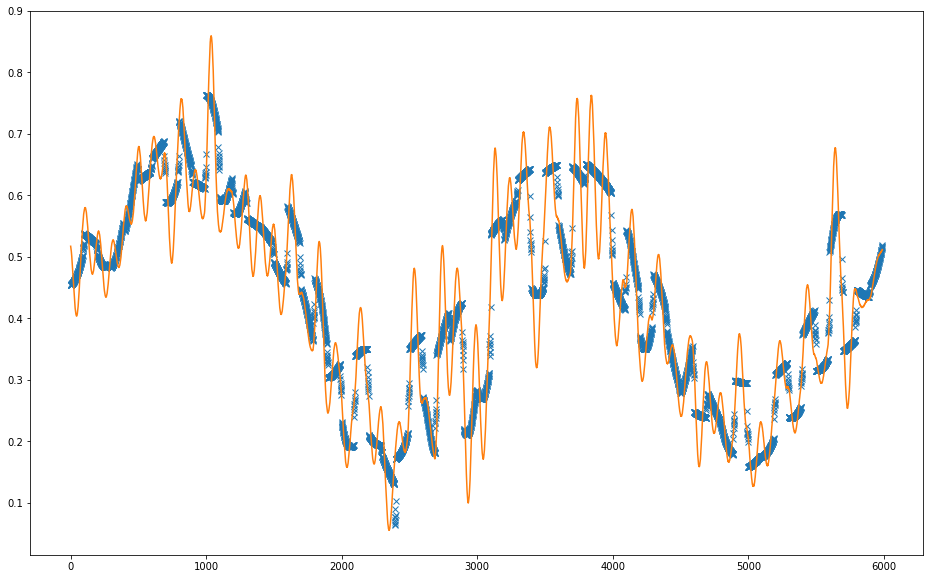

{'Iteration': 0, 'Train error': 107.08458135203118, 'Test error': 16.99240429967648, 'Independent error': 0, 'Training time': 0.0, 'Total time': 1.915067434310913}


In [10]:
######################## TEST FEED-FORWARD MODEL ###########################

t0 = time.time()
for i in range(n_batches):

    df_D = pd.read_csv('C:/Users/endrep/Documents/training_batches/D' + str(i+1) + '.csv')
    df_F = pd.read_csv('C:/Users/endrep/Documents/training_batches/F' + str(i+1) + '.csv')
    
    X_train, Y_train, n_timesteps, n_nodes, x = prepare_training_data(df_F, df_D, d, t)
    
    X_train_s, Y_train_s, x_scaler, y_scaler = scale_training_data(X_train, Y_train)
    
    x_train, y_train, x_test, y_test = train_test_split(X_train_s, Y_train_s, 0.8)
    
    input_dim = len(X_train[0,:])
    output_dim = len(Y_train[0,:])

    #if i == 0:
    #    model = baseline_model(input_dim, output_dim, 100)
    
    ts = time.time()
    #model.fit(x_train, y_train, epochs=100, verbose = 1)
    training_time = time.time() - ts
    
    pred_train = model.predict(x_train)
    pred_train_u = y_scaler.inverse_transform(pred_train)
    
    pred_test = model.predict(x_test)
    pred_test_u = y_scaler.inverse_transform(pred_test)
    

    plt.figure(figsize=(16,10))
    plt.plot(pred_test[:, n_nodes-1], 'x')
    plt.plot(y_test[:, n_nodes-1])
    plt.show()
    
    training_error = get_error(pred_train, y_train)
    test_error = get_error(pred_test, y_test)
    ind_error = 0
    
    total_time = time.time() - t0
    
    info = {'Iteration': i, 'Train error': training_error, 'Test error': test_error, 'Independent error': ind_error,
            'Training time': training_time, 'Total time': total_time}
    
    print(info)


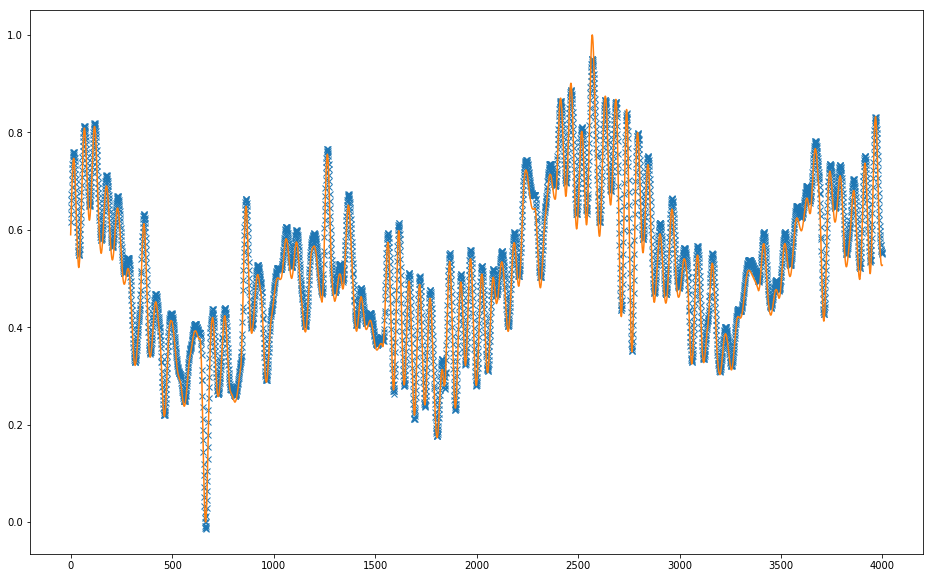

In [93]:
plt.figure(figsize=(16,10))
plt.plot(pred_train[:,n_nodes-1], 'x')
plt.plot(y_train[:, n_nodes-1])
plt.show()

In [247]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")